In [33]:
pylab inline

SyntaxError: invalid syntax (<ipython-input-33-5353de881c66>, line 1)

In [34]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [35]:
#plt.savefig('SRF21_totKE_VS_A.png')

In [36]:
matplotlib.rcParams.update({'font.size': 22})
matplotlib.rcParams.update({'legend.framealpha': 1})
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import AutoMinorLocator

In [37]:
def orderplot(a,b):
    plotable = [[a[i], b[i]] for i in range(size(a))]
    plotable.sort(key=lambda x: x[0])
    plotable = numpy.array(plotable)
    return plotable

In [38]:
dataWN = genfromtxt('ryan_summary_file.dat',dtype='str')
dataTEMP = np.delete(dataWN, 0, 1)
dataTEMP = dataTEMP.astype(float)
print ( dataWN[0,:], '\n', size(dataWN[0,:]), '\n', '\n',dataTEMP[0,:], '\n', size(dataTEMP[0,:]))

['b10_3p' '5.000' '5.000' '0.602' '0.366' '0.602' '0.366' '151.641'
 '151.641' '89.107' '75.787' '89.107' '75.787' '4.998' '0.082' '0.074'
 '2.360' '4.998' '0.082' '0.074' '2.360' '10.002' '24.999' '10.002'
 '0.016' '0.032' '0.016' '3.616' '3.437' '3.616' '0' '5' '5'] 
 33 
 
 [5.00000e+00 5.00000e+00 6.02000e-01 3.66000e-01 6.02000e-01 3.66000e-01
 1.51641e+02 1.51641e+02 8.91070e+01 7.57870e+01 8.91070e+01 7.57870e+01
 4.99800e+00 8.20000e-02 7.40000e-02 2.36000e+00 4.99800e+00 8.20000e-02
 7.40000e-02 2.36000e+00 1.00020e+01 2.49990e+01 1.00020e+01 1.60000e-02
 3.20000e-02 1.60000e-02 3.61600e+00 3.43700e+00 3.61600e+00 0.00000e+00
 5.00000e+00 5.00000e+00] 
 32


In [39]:
tagIndex = 29
print(dataWN[18,0],float(dataTEMP[18,tagIndex]))
#test2[18,20]=0
#print(test2[18,0],float(test2[18,tagIndex]))
i=0
while i<size(dataWN[:,0]):
    if "b10" in dataWN[i,0] or "be10" in dataWN[i,0] or "he6" in dataWN[i,0] or "he8" in dataWN[i,0] or "li9" in dataWN[i,0]:
        dataTEMP[i,tagIndex] = 1
    i+=1

h3_dn 0.0


In [40]:
data=dataTEMP
dabigA2 = zeros(size(data[:,0]))
dabigA = zeros(size(data[:,0]))
i=0
Zindex = 30
Nindex = 31
while i<size(data[:,0]):
    dabigA[i] = data[i,Zindex]+data[i,Nindex]
    dabigA2[i] = dabigA[i]+.1*(data[i,Nindex]-data[i,Zindex])
    #print(data[i,0], dabigA2[i])
    i+=1

In [41]:
normPindex = 0
normNindex = 1
mom1Pindex = 2
mom1Nindex = 4
mom2Pindex = 3
mom2Nindex = 5
totKeP = 6 
totKeN = 7
Ke1P = 8
Ke2P = 9
Ke1N = 10
Ke2N = 11
denNormPindex = 12
avgdenPindexOther = 13
avgdenPindex = 14
rmsPindex = 15
denNormNindex = 16
avgdenNindexOther = 17
avgdenNindex = 18
rmsNindex = 19
normPPindex = 20
normNPindex = 21
normNNindex = 22
nearPPindex = 23
nearNPindex = 24
nearNNindex = 25

In [42]:
ArrData=loadtxt('Arr_Summary_File.dat', dtype='float')
#ArrdabigA2 = [.1]
NNN = (ArrData[:,2]-ArrData[:,1])
NNN = .1*NNN
ArrdabigA2 = ArrData[:,0] + NNN

i=0
while i<size(data[:,0]):
    if float(data[i,1]) != 0 and float(data[i,tagIndex]) == 1 and dabigA2[i] <= 12:
        RMSN = 0.85
        RMSA = (data[i,rmsPindex]*data[i,Zindex] + data[i,rmsNindex]*data[i,Nindex])/dabigA[i]
        RMSF = sqrt((RMSN**2)+(RMSA**2))
        DenScale = ((RMSA**3)/(RMSF**3))
        j=0
        while j < size(ArrdabigA2):
            if ArrdabigA2[j] == dabigA2[i]:
                ArrData[j,16] = ArrData[j,16] * DenScale
                #print(ArrData[j,1], ArrData[j,2], '\n', data[i,Zindex], data[i,Nindex])
            j+=1
    i+=1
correctH= ArrData[0,16] * (ArrData[0,0]-1)/ArrData[0,0]
correctC= ArrData[9,16] * (ArrData[9,0]-1)/ArrData[9,0] - correctH
ArrDen = orderplot(ArrdabigA2, (ArrData[:,16]*(ArrData[:,0]-1)/ArrData[:,0] - correctH)/correctC)
Arrfrac = orderplot(ArrdabigA2,(ArrData[:,7]-ArrData[0,7])/(ArrData[9,7]-ArrData[0,7]))
ArrKE = orderplot(ArrdabigA2,(ArrData[:,10]-ArrData[0,10])/(ArrData[9,10]-ArrData[0,10]))
ArrDataCheating = loadtxt('ArrData.dat', dtype='float')
NNN = ArrDataCheating[:,1]-ArrDataCheating[:,0]
NNN = NNN - ArrDataCheating[:,0]
NNN = .1*NNN
ArrdabigA2C = ArrDataCheating[:,1]+NNN
Arr1 = orderplot(ArrdabigA2C,(ArrDataCheating[:,4]-ArrDataCheating[0,4])/(ArrDataCheating[14,4]-ArrDataCheating[0,4]))

RawArrDen = orderplot(ArrdabigA2,ArrData[:,16])
RawArrfrac = orderplot(ArrdabigA2,ArrData[:,7])
RawArrKE = orderplot(ArrdabigA2,ArrData[:,10])
RawArr1 = orderplot(ArrdabigA2C,ArrDataCheating[:,4])


In [43]:
print(ArrData[9,0])
print(ArrDataCheating[14,1])

12.0
12.0


Text(0.5, 1.0, 'Effects relative to C12')

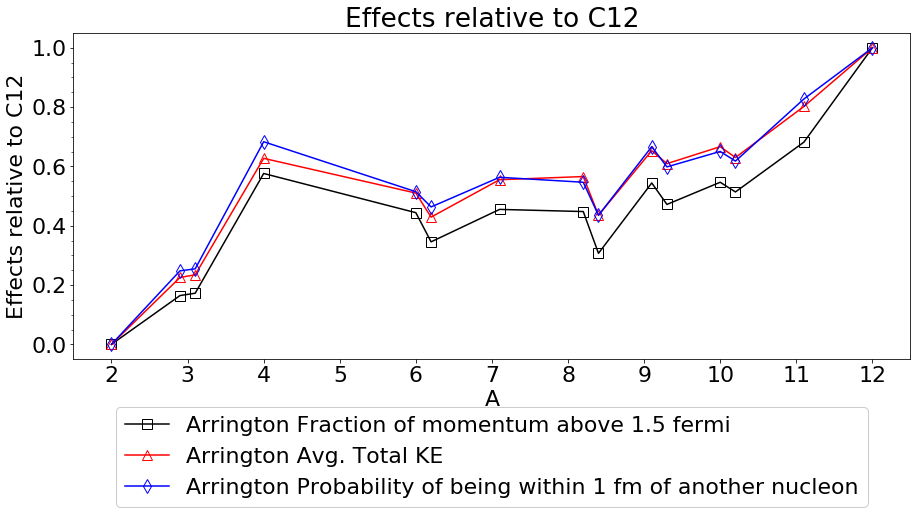

In [44]:
plt.figure(figsize=(15, 6))
plt.xticks(range(0, 21))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
sized = 10

#plot(ArrDen[:,0], ArrDen[:,1],'-go', mfc='none' ,markersize=sized, label='Arrington Avg. Density')
plot(Arrfrac[:,0],Arrfrac[:,1],'-ks', mfc='none', markersize=sized, label='Arrington Fraction of momentum above 1.5 fermi')
plot(ArrKE[:,0], ArrKE[:,1],'-r^', mfc='none', markersize=sized, label='Arrington Avg. Total KE')
plot(Arr1[:,0], Arr1[:,1],'-bd', mfc='none', markersize=sized, label='Arrington Probability of being within 1 fm of another nucleon')
xlabel('A')
ylabel('Effects relative to C12')
#labels = ['Avg. Density','Fraction of momentum above 1.5 fermi','Avg. Total KE','Probability of being within 1 fm of another nucleon']
legend(loc="center", bbox_to_anchor=(.5,-.3))
title('Effects relative to C12')

Text(0.5, 1.0, 'Effects relative to C12')

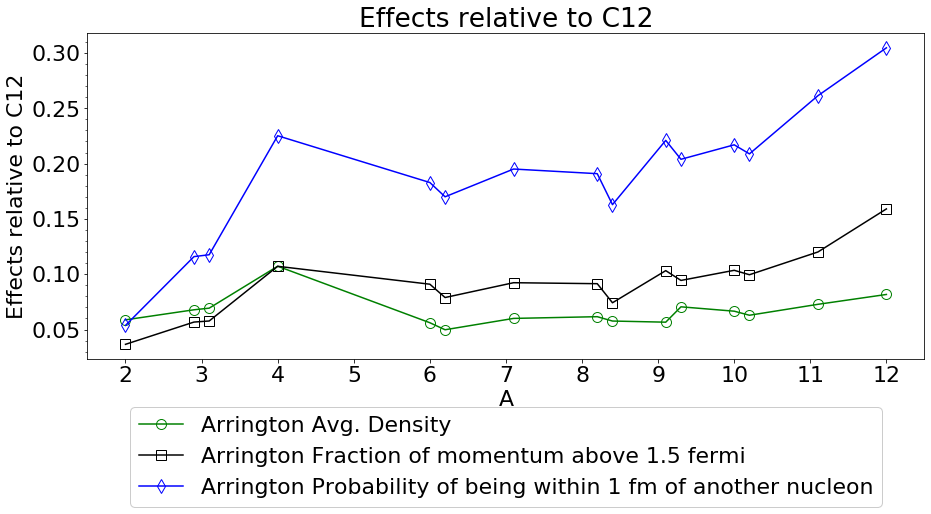

In [45]:
plt.figure(figsize=(15, 6))
plt.xticks(range(0, 21))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
sized = 10

plot(RawArrDen[:,0], RawArrDen[:,1],'-go', mfc='none', markersize=sized, label='Arrington Avg. Density')
plot(RawArrfrac[:,0],RawArrfrac[:,1],'-ks', mfc='none', markersize=sized, label='Arrington Fraction of momentum above 1.5 fermi')
#plot(RawArrKE[:,0], RawArrKE[:,1],'-r^', mfc='none', markersize=sized, label='Arrington Avg. Total KE')
plot(RawArr1[:,0], RawArr1[:,1],'-bd', mfc='none', markersize=sized, label='Arrington Probability of being within 1 fm of another nucleon')
xlabel('A')
ylabel('Effects relative to C12')
#labels = ['Avg. Density','Fraction of momentum above 1.5 fermi','Avg. Total KE','Probability of being within 1 fm of another nucleon']
legend(loc="center", bbox_to_anchor=(.5,-.3))
title('Effects relative to C12')

In [46]:
tim = orderplot(dabigA2,data)
timt= tim[:,0]
tim = tim[:,1]
tim = numpy.array(tim)
timt[50]
#tim[1][0]

11.5

In [47]:
i=0
while i<size(data[:,0]):
    if data[i,0] != 0 and data[i,tagIndex] == 1:
        print(dataWN[i,0], data[i,totKeP], data[i,totKeN])
    i+=1

b10_3p 151.641 151.641
b11 159.909 181.515
be10_0p 127.237 163.06
be9 118.678 135.073
c12 199.55 199.55
ca40 604.063 604.063
h2 9.867 9.867
h3 19.526 29.82
he3 29.292 19.287
he4 54.938 54.938
he6 55.213 76.239
he8 61.089 115.7
li8 86.466 119.526
li9 93.738 149.014
o16 229.8 229.8


b10_3p 0.074 0.074 0.074
b11 0.07936371077762619 0.081 0.078
be10_0p 0.07139915966386555 0.075 0.069
be9 0.060333296288064005 0.062 0.059
c12 0.088 0.088 0.088
ca40 0.09 0.09 0.09
h2 0.038 0.038 0.038
h3 0.06400000000000002 0.066 0.063
he3 0.063 0.062 0.065
he4 0.126 0.126 0.126
he6 0.047665721907302436 0.059 0.042
he8 0.0579982495623906 0.079 0.051
li8 0.06512482801751093 0.072 0.061
li9 0.07533274041133962 0.086 0.07
o16 0.089 0.089 0.089


Text(0.5, 1.0, 'Density Vs. A')

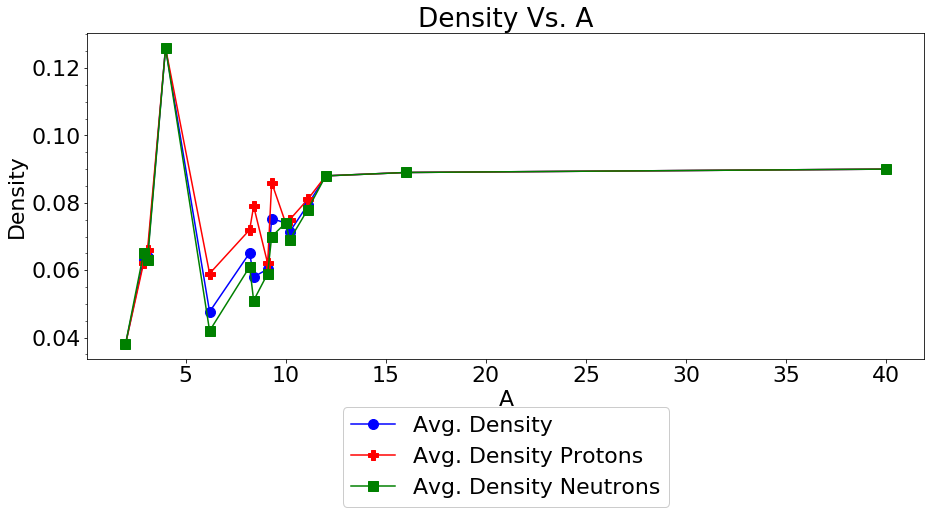

In [48]:
sized = 10
plt.figure(figsize=(15, 6))
#plt.xticks(range(0, 40))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())

DensityA = zeros(size(data[:,0]))
DensityP = zeros(size(data[:,0]))
DensityN = zeros(size(data[:,0]))
dabigAhold = []
DensityAhold = []
DensityPhold = []
DensityNhold = []
i = 0
while i<size(data[:,0]):
    if data[i,0] != 0 and data[i,tagIndex] == 1: #and dabigA2[i] <= 12:
        NORMP = data[i,denNormPindex]
        NORMN = data[i,denNormNindex]
        NORM = NORMP + NORMN
        DensityA[i] = (data[i,avgdenPindex]*NORMP+data[i,avgdenNindex]*NORMN)/NORM
        DensityP[i] = data[i,avgdenPindex] #* NORMP
        DensityN[i] = data[i,avgdenNindex] #* NORMN
        dabigAhold.append(dabigA2[i])
        DensityAhold.append(DensityA[i])
        DensityPhold.append(DensityP[i])
        DensityNhold.append(DensityN[i])
        print (dataWN[i,0], DensityA[i], data[i,avgdenPindex], data[i,avgdenNindex])
    i+=1
DensityAplot = orderplot(dabigAhold,DensityAhold)
DensityPplot = orderplot(dabigAhold,DensityPhold)
DensityNplot = orderplot(dabigAhold,DensityNhold)
plot(DensityAplot[:,0], DensityAplot[:,1],'-bo', markersize=sized, label='Avg. Density')
plot(DensityPplot[:,0], DensityPplot[:,1],'-rP', markersize=sized, label='Avg. Density Protons')
plot(DensityNplot[:,0], DensityNplot[:,1],'-gs', markersize=sized, label='Avg. Density Neutrons')
xlabel('A')
ylabel('Density')
#labels = ['Total KE','KE from High momentum nucleons >1.5 fm','KE from High momentum nucleons >2 fm']
legend(loc="center", bbox_to_anchor=(.5,-.3))
title('Density Vs. A')

Text(0.5, 1.0, 'Avg. KE Vs. A')

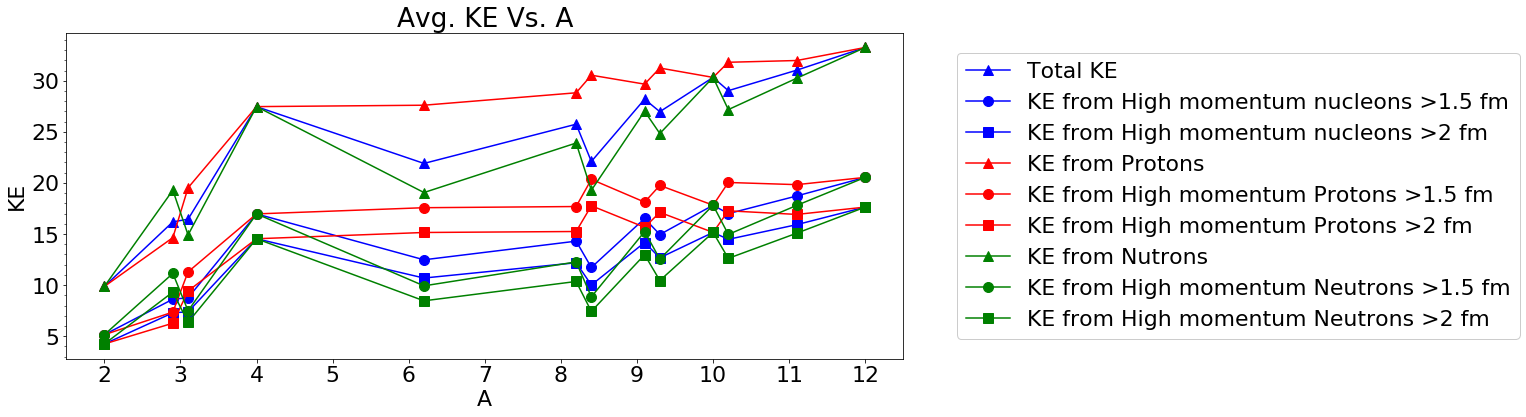

In [49]:
KEtot = zeros(size(data[:,0]))
KE1 = zeros(size(data[:,0]))
KE2 = zeros(size(data[:,0]))
KEtotP = zeros(size(data[:,0]))
KE1P = zeros(size(data[:,0]))
KE2P = zeros(size(data[:,0]))
KEtotN = zeros(size(data[:,0]))
KE1N = zeros(size(data[:,0]))
KE2N = zeros(size(data[:,0]))
dabigAhold = []
KEtothold = []
KE1hold = []
KE2hold = []
KEtotPhold = []
KE1Phold = []
KE2Phold = []
KEtotNhold = []
KE1Nhold = []
KE2Nhold = []

sized = 10
plt.figure(figsize=(15, 6))
plt.xticks(range(0, 21))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())

i = 0
while i<size(data[:,0]):
    if data[i,0] != 0 and data[i,tagIndex] == 1 and dabigA2[i] <= 12:
        NORMP = data[i,normPindex]
        NORMN = data[i,normNindex]
        NORM = NORMP + NORMN
        KEtot[i] = (data[i,totKeP]+data[i,totKeN])/NORM
        KE1[i] = (data[i,Ke1P]+data[i,Ke1N])/NORM
        KE2[i] = (data[i,Ke2P]+data[i,Ke2N])/NORM
        KEtotP[i] = data[i,totKeP]/NORMP
        KE1P[i] = data[i,Ke1P]/NORMP
        KE2P[i] = data[i,Ke2P]/NORMP
        KEtotN[i] = data[i,totKeN]/NORMN
        KE1N[i]  = data[i,Ke1N]/NORMN
        KE2N[i] = data[i,Ke2N]/NORMN
        dabigAhold.append(dabigA2[i])
        KEtothold.append(KEtot[i])
        KE1hold.append(KE1[i])
        KE2hold.append(KE2[i])
        KEtotPhold.append(KEtotP[i])
        KE1Phold.append(KE1P[i])
        KE2Phold.append(KE2P[i])
        KEtotNhold.append(KEtotN[i])
        KE1Nhold.append(KE1N[i])
        KE2Nhold.append(KE2N[i])
    i+=1
KEtotplot = orderplot(dabigAhold,KEtothold)
KE1plot = orderplot(dabigAhold,KE1hold)
KE2plot = orderplot(dabigAhold,KE2hold)
KEtotPplot = orderplot(dabigAhold,KEtotPhold)
KE1Pplot = orderplot(dabigAhold,KE1Phold)
KE2Pplot = orderplot(dabigAhold,KE2Phold)
KEtotNplot = orderplot(dabigAhold,KEtotNhold)
KE1Nplot = orderplot(dabigAhold,KE1Nhold)
KE2Nplot = orderplot(dabigAhold,KE2Nhold)

plot(KEtotplot[:,0], KEtotplot[:,1],'-b^',markersize=sized,label='Total KE')
plot(KE1plot[:,0], KE1plot[:,1],'-bo', markersize=sized,label='KE from High momentum nucleons >1.5 fm')   
plot(KE2plot[:,0], KE2plot[:,1],'-bs', markersize=sized,label='KE from High momentum nucleons >2 fm')
plot(KEtotPplot[:,0], KEtotPplot[:,1],'-r^',markersize=sized,label='KE from Protons')
plot(KE1Pplot[:,0], KE1Pplot[:,1],'-ro', markersize=sized,label='KE from High momentum Protons >1.5 fm')   
plot(KE2Pplot[:,0], KE2Pplot[:,1],'-rs', markersize=sized,label='KE from High momentum Protons >2 fm')
plot(KEtotNplot[:,0], KEtotNplot[:,1],'-g^',markersize=sized,label='KE from Nutrons')
plot(KE1Nplot[:,0], KE1Nplot[:,1],'-go', markersize=sized,label='KE from High momentum Neutrons >1.5 fm')   
plot(KE2Nplot[:,0], KE2Nplot[:,1],'-gs', markersize=sized,label='KE from High momentum Neutrons >2 fm')

xlabel('A')
ylabel('KE')
#labels = ['Total KE','KE from High momentum nucleons >1.5 fm','KE from High momentum nucleons >2 fm']
legend(loc="center", bbox_to_anchor=(1.4,.5))
title('Avg. KE Vs. A')

Text(0.5, 1.0, 'KE Vs. A')

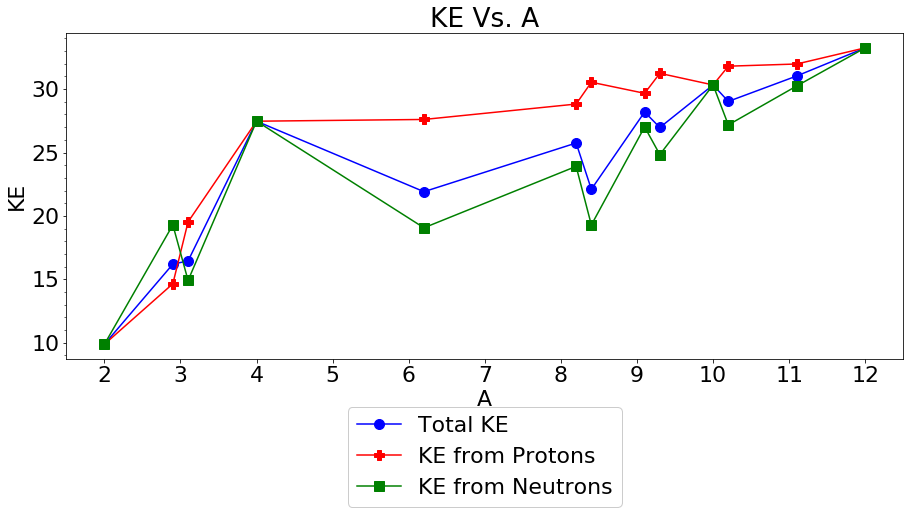

In [50]:
sized = 10
plt.figure(figsize=(15, 6))
plt.xticks(range(0, 21))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())

plot(KEtotplot[:,0], KEtotplot[:,1],'-bo',markersize=sized,label='Total KE')
plot(KEtotPplot[:,0], KEtotPplot[:,1],'-rP',markersize=sized,label='KE from Protons')
plot(KEtotNplot[:,0], KEtotNplot[:,1],'-gs',markersize=sized,label='KE from Neutrons')

xlabel('A')
ylabel('KE')
legend(loc="center", bbox_to_anchor=(.5,-.3))
title('KE Vs. A')

Text(0.5, 1.0, 'KE Vs. A')

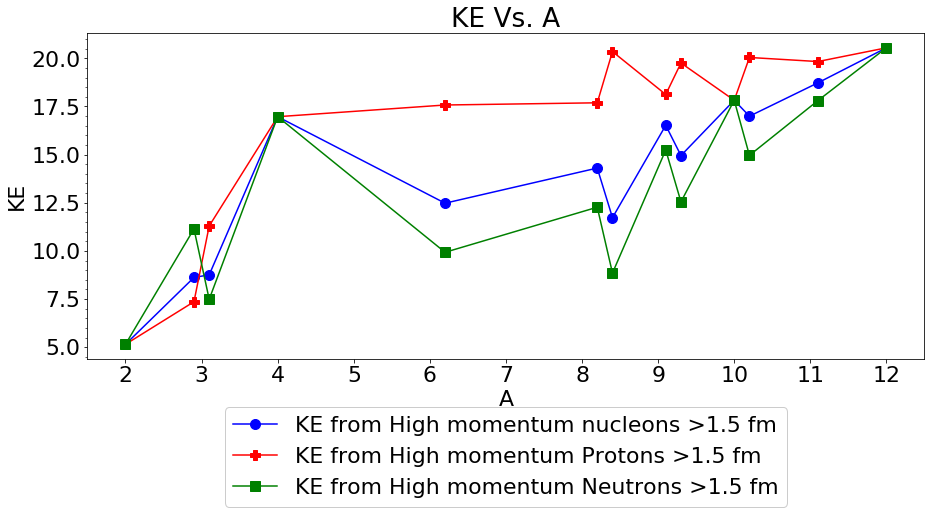

In [51]:
sized = 10
plt.figure(figsize=(15, 6))
plt.xticks(range(0, 21))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())

plot(KE1plot[:,0], KE1plot[:,1],'-bo', markersize=sized,label='KE from High momentum nucleons >1.5 fm')   
plot(KE1Pplot[:,0], KE1Pplot[:,1],'-rP', markersize=sized,label='KE from High momentum Protons >1.5 fm')   
plot(KE1Nplot[:,0], KE1Nplot[:,1],'-gs', markersize=sized,label='KE from High momentum Neutrons >1.5 fm')   

xlabel('A')
ylabel('KE')
legend(loc="center", bbox_to_anchor=(.5,-.3))
title('KE Vs. A')

Text(0.5, 1.0, 'KE Vs. A')

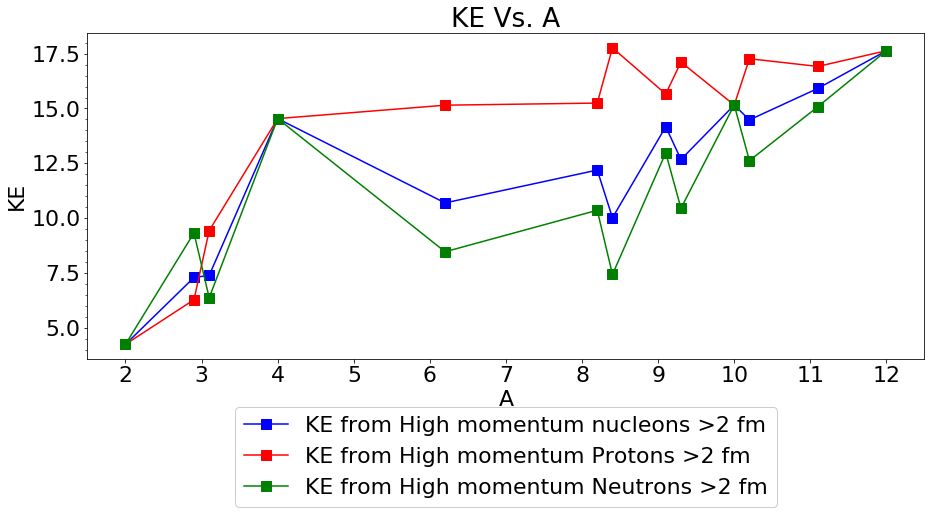

In [52]:
sized = 10
plt.figure(figsize=(15, 6))
plt.xticks(range(0, 21))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())


plot(KE2plot[:,0], KE2plot[:,1],'-bs', markersize=sized,label='KE from High momentum nucleons >2 fm')
plot(KE2Pplot[:,0], KE2Pplot[:,1],'-rs', markersize=sized,label='KE from High momentum Protons >2 fm')
plot(KE2Nplot[:,0], KE2Nplot[:,1],'-gs', markersize=sized,label='KE from High momentum Neutrons >2 fm')

xlabel('A')
ylabel('KE')
legend(loc="center", bbox_to_anchor=(.5,-.3))
title('KE Vs. A')

In [53]:
tim[1][0]

0.826

Text(0.5, 1.0, 'Fraction of Nucleons Vs. A')

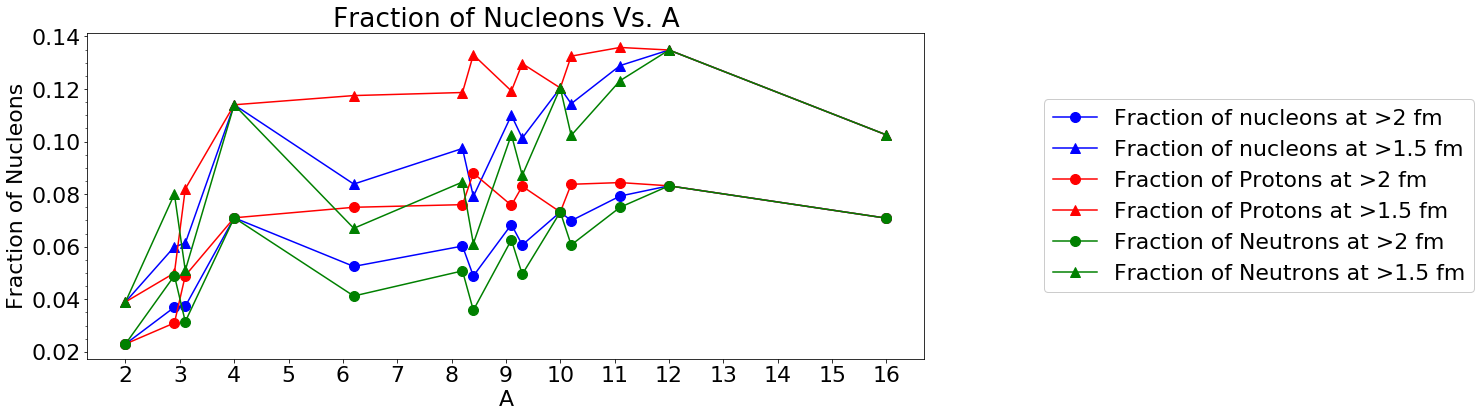

In [54]:
NFHM2 = []
NFHM1 = []
NFHMP2 = []
NFHMP1 = []
NFHMN2 = []
NFHMN1 = []
dabigAhold = []

plt.figure(figsize=(15, 6))
plt.xticks(range(0, 21))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())

i=0
while i<size(data[:,0]):
    if tim[i][0] != 0 and tim[i][tagIndex] == 1 and timt[i] != 40:
        NORMP = tim[i][normPindex]
        NORMN = tim[i][normNindex]
        NORM = NORMP + NORMN
        NFHM1.append((tim[i][mom1Pindex]+tim[i][mom1Nindex])/NORM)
        NFHM2.append((tim[i][mom2Pindex]+tim[i][mom2Nindex])/NORM)
        NFHMP1.append(tim[i][mom1Pindex]/NORMP)
        NFHMP2.append(tim[i][mom2Pindex]/NORMP)
        NFHMN1.append(tim[i][mom1Nindex]/NORMN)
        NFHMN2.append(tim[i][mom2Nindex]/NORMN)
        dabigAhold.append(timt[i])
        #print( dataWN[i,0],NORM)
    i+=1
plot(dabigAhold, NFHM2,'-bo', markersize=sized, label='Fraction of nucleons at >2 fm')
plot(dabigAhold, NFHM1,'-b^', markersize=sized, label='Fraction of nucleons at >1.5 fm')
plot(dabigAhold, NFHMP2,'-ro', markersize=sized, label='Fraction of Protons at >2 fm')
plot(dabigAhold, NFHMP1,'-r^', markersize=sized, label='Fraction of Protons at >1.5 fm')
plot(dabigAhold, NFHMN2,'-go', markersize=sized, label='Fraction of Neutrons at >2 fm')
plot(dabigAhold, NFHMN1,'-g^', markersize=sized, label='Fraction of Neutrons at >1.5 fm')
xlabel('A')
ylabel('Fraction of Nucleons')
#labels =['fraction of nucleons at >1.5 fm','fraction of nucleons at >2 fm']
legend(loc="center", bbox_to_anchor=(1.4,.5))
title('Fraction of Nucleons Vs. A')

In [55]:
dataWN[12,0]

'c12'

b10_3p 0.061627465083362205 0.074 0.074
b11 0.06631190262970793 0.081 0.078
be10_0p 0.05974212869456741 0.075 0.069
be9 0.05065113892038056 0.062 0.059
c12 0.07336132817578149 0.088 0.088
h2 0.029400608639747444 0.038 0.038
h3 0.04582695983276163 0.066 0.063
he3 0.045481396631599495 0.062 0.065
he4 0.08051236092066505 0.126 0.126
he6 0.04057569384153348 0.059 0.042
he8 0.04955032706479936 0.079 0.051
li8 0.05392026074799696 0.072 0.061
li9 0.0623766222731085 0.086 0.07


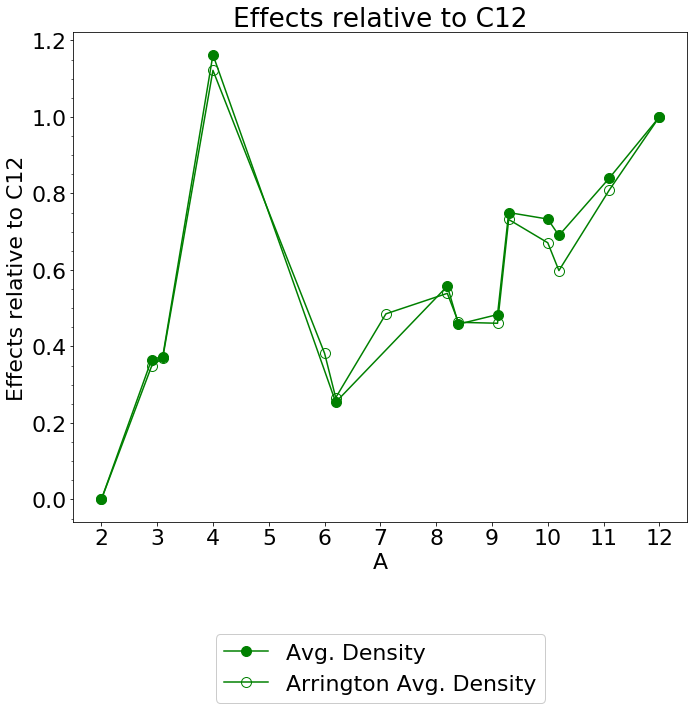

In [56]:
sized = 10
plt.figure(figsize=(11, 9))
plt.xticks(range(0, 21))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
C12index = 12
h2index = 16

NORMP = data[C12index,normPindex]
NORMN = data[C12index,normNindex]
NORM = NORMP + NORMN
RMSN = 0.85
RMSA = (data[C12index,rmsPindex]*data[C12index,Zindex] + data[C12index,rmsNindex]*data[C12index,Nindex])/dabigA[C12index]
RMSF = sqrt((RMSN**2)+(RMSA**2))
DenScale = ((RMSA**3)/(RMSF**3))
KE_C12 = (data[C12index,totKeP]+data[C12index,totKeN])/NORM
#den_C12 = (data[C12index,avgdenPindex]+data[C12index,avgdenNindex])*DenScale
den_C12 = ((data[C12index,avgdenPindex]*NORMP+data[C12index,avgdenNindex]*NORMN)/NORM)*DenScale
FracDis_C12 = (data[C12index,mom1Pindex]+data[C12index,mom1Nindex])/(NORM)
nearpp = ((data[C12index,Zindex]*(data[C12index,Zindex]-1))/2)*data[C12index,nearPPindex]
nearnn = ((data[C12index,Nindex]*(data[C12index,Nindex]-1))/2)*data[C12index,nearNNindex]
nearnp = data[C12index,nearNPindex]*data[C12index,Nindex]*data[C12index,Zindex]
near_C12 = (2/dabigA[C12index])*(nearpp+nearnn+nearnp)

C12index = h2index
NORMP = data[C12index,normPindex]
NORMN = data[C12index,normNindex]
NORM = NORMP + NORMN
RMSN = 0.85
RMSA = (data[C12index,rmsPindex]*data[C12index,Zindex] + data[C12index,rmsNindex]*data[C12index,Nindex])/dabigA[C12index]
RMSF = sqrt((RMSN**2)+(RMSA**2))
DenScale = ((RMSA**3)/(RMSF**3))
KE_h2 = (data[C12index,totKeP]+data[C12index,totKeN])/NORM
#den_h2 = (data[C12index,avgdenPindex]+data[C12index,avgdenNindex])*DenScale
den_h2 = ((data[C12index,avgdenPindex]*NORMP+data[C12index,avgdenNindex]*NORMN)/NORM)*DenScale
FracDis_h2 = (data[C12index,mom1Pindex]+data[C12index,mom1Nindex])/(NORM)
nearpp = ((data[C12index,Zindex]*(data[C12index,Zindex]-1))/2)*data[C12index,nearPPindex]
nearnn = ((data[C12index,Nindex]*(data[C12index,Nindex]-1))/2)*data[C12index,nearNNindex]
nearnp = data[C12index,nearNPindex]*data[C12index,Nindex]*data[C12index,Zindex]
near_h2 = (2/dabigA[C12index])*(nearpp+nearnn+nearnp)

KE_C12 = KE_C12-KE_h2
den_C12 = den_C12-den_h2
FracDis_C12 = FracDis_C12-FracDis_h2
near_C12 = near_C12-near_h2

avgKEtot = zeros(size(data[:,0]))
avgDen = zeros(size(data[:,0]))
fracDis = zeros(size(data[:,0]))
near = zeros(size(data[:,0]))
dabigAhold = []
avgDenhold = []
fracDishold = []
avgKEtothold = []
nearhold = []
denscalinghold = []
RMSAhold = []
i=0
while i<size(data[:,0]):
    if float(data[i,1]) != 0 and float(data[i,tagIndex]) == 1 and dabigA2[i] <= 12:
        RMSN = 0.85
        RMSA = (data[i,rmsPindex]*data[i,Zindex] + data[i,rmsNindex]*data[i,Nindex])/dabigA[i]
        RMSF = sqrt((RMSN**2)+(RMSA**2))
        DenScale = ((RMSA**3)/(RMSF**3))
        NORM =  data[i,normPindex] + data[i,normNindex]
        NORMP = data[i,normPindex] 
        NORMN = data[i,normNindex]
        DENNORM = (data[i,13]+data[i,15])
        avgKEtot[i] = (data[i,totKeP]+data[i,totKeN])/NORM
        #avgDen[i] = (data[i,avgdenPindex]+data[i,avgdenNindex])*DenScale
        avgDen[i] = ((data[i,avgdenPindex]*NORMP+data[i,avgdenNindex]*NORMN)/NORM)*DenScale #*(dabigA[i]-1)/dabigA[i]
        fracDis[i] = (data[i,mom1Pindex]+data[i,mom1Nindex])/NORM
        nearpp = ((data[i,Zindex]*(data[i,Zindex]-1))/2)*data[i,nearPPindex]
        nearnn = ((data[i,Nindex]*(data[i,Nindex]-1))/2)*data[i,nearNNindex]
        nearnp = data[i,nearNPindex]*data[i,Nindex]*data[i,Zindex]
        near[i] = (2/dabigA[i])*(nearpp+nearnn+nearnp)
        dabigAhold.append(dabigA2[i])
        avgDenhold.append((avgDen[i]-den_h2)/den_C12)
        fracDishold.append((fracDis[i]-FracDis_h2)/FracDis_C12)
        avgKEtothold.append((avgKEtot[i]-KE_h2)/KE_C12)
        nearhold.append((near[i]-near_h2)/near_C12)
        denscalinghold.append(DenScale)
        RMSAhold.append(RMSA)
        print(dataWN[i,0], avgDen[i],data[i,avgdenPindex],data[i,avgdenNindex] )
    i+=1
#RMSAplot = 
DenScaleplot = orderplot(dabigAhold,denscalinghold)
avgDenplot  = [[dabigAhold[i], avgDenhold[i]] for i in range(size(dabigAhold))]
fracDisplot = [[dabigAhold[i], fracDishold[i]] for i in range(size(dabigAhold))]
avgKEtotplot = [[dabigAhold[i], avgKEtothold[i]] for i in range(size(dabigAhold))]
nearplot = [[dabigAhold[i], nearhold[i]] for i in range(size(dabigAhold))]
avgDenplot.sort(key=lambda x: x[0])
fracDisplot.sort(key=lambda x: x[0])
avgKEtotplot.sort(key=lambda x: x[0])
nearplot.sort(key=lambda x: x[0])
avgDenplot  = numpy.array(avgDenplot)
fracDisplot  = numpy.array(fracDisplot)
avgKEtotplot  = numpy.array(avgKEtotplot)
nearplot  = numpy.array(nearplot)

#plot(DenScaleplot[:,0], DenScaleplot[:,1],'-ko', markersize=sized, label='Density Scaling Factor')

plot(avgDenplot[:,0], avgDenplot[:,1],'-go', markersize=sized, label='Avg. Density')
#plot(fracDisplot[:,0],fracDisplot[:,1],'-ks', markersize=sized, label='Fraction of momentum above 1.5 fermi')
#plot(avgKEtotplot[:,0], avgKEtotplot[:,1],'-r^',markersize=sized, label='Avg. Total KE')
#plot(nearplot[:,0], nearplot[:,1],'-bd', markersize=sized, label='Probability of being within 1 fm of another nucleon')

plot(ArrDen[:,0], ArrDen[:,1],'-go', mfc='none', markersize=sized, label='Arrington Avg. Density')
#plot(Arrfrac[:,0],Arrfrac[:,1],'-ks', mfc='none', markersize=sized, label='Arrington Fraction of momentum above 1.5 fermi')
#plot(ArrKE[:,0], ArrKE[:,1],'-r^', mfc='none', markersize=sized, label='Arrington Avg. Total KE')
#plot(Arr1[:,0], Arr1[:,1],'-bd', mfc='none', markersize=sized, label='Arrington Probability of being within 1 fm of another nucleon')

xlabel('A')
ylabel('Effects relative to C12')
#labels = ['Avg. Density','Fraction of momentum above 1.5 fermi','Avg. Total KE','Probability of being within 1 fm of another nucleon']
legend(loc="center", bbox_to_anchor=(.5,-.3))
title('Effects relative to C12')

avgKEtotD = avgKEtot
avgDenD = avgDen
fracDisD = fracDis
nearD = near

In [57]:
i=0
while i < size(data[:,0]):
    if 'be' in dataWN[i,0]:
        print(dataWN[i,0],data[i,avgdenPindex], data[i,avgdenNindex], data[i,rmsPindex] , data[i,rmsNindex])
    i+=1

be10_0p 0.075 0.069 2.283 2.466
be12 0.073 0.063 2.41 2.723
be8_0 0.0 0.0 0.0 0.0
be8_2 0.0 0.0 0.0 0.0
be8_4 0.0 0.0 0.0 0.0
be8_aa0 0.0 0.0 0.0 0.0
be8_aa2 0.0 0.0 0.0 0.0
be8_aa4 0.0 0.0 0.0 0.0
be9 0.062 0.059 2.358 2.464
be6 0.04 0.056 2.903 1.975
be7 0.049 0.054 2.413 2.258
be7s 0.046 0.052 2.856 2.586
be8.av18uix 0.051 0.051 2.42 2.42
be8 0.054 0.054 2.377 2.377


b10_3p
b11
be10_0p
be9
c12
h2
h3
he3
he4
he6
he8
li8
li9


Text(0.5, 1.0, 'Effects NOT relative to C12')

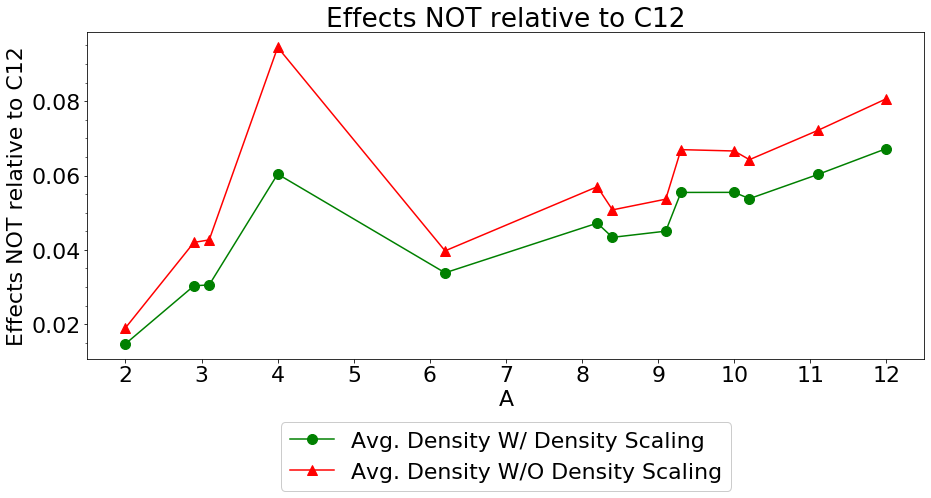

In [58]:
sized = 10
plt.figure(figsize=(15, 6))
plt.xticks(range(0, 21))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())

avgKEtot = zeros(size(data[:,0]))
avgDen = zeros(size(data[:,0]))
avgDenNO = zeros(size(data[:,0]))
fracDis = zeros(size(data[:,0]))
near = zeros(size(data[:,0]))
dabigAhold = []
avgDenhold = []
avgDenNOhold = []
fracDishold = []
avgKEtothold = []
nearhold = []
i=0
while i<size(data[:,0]):
    if float(data[i,1]) != 0 and float(data[i,tagIndex]) == 1 and dabigA2[i] <= 12:
        RMSN = 0.85
        RMSA = (data[i,rmsPindex]*data[i,Zindex] + data[i,rmsNindex]*data[i,Nindex])/dabigA[i]
        RMSF = sqrt((RMSN**2)+(RMSA**2))
        DenScale = ((RMSA**3)/(RMSF**3))
        NORM =  data[i,normPindex] + data[i,normNindex]
        NORMP = data[i,normPindex] 
        NORMN = data[i,normNindex]
        DENNORM = (data[i,13]+data[i,15])
        avgKEtot[i] = (data[i,totKeP]+data[i,totKeN])/NORM
        avgDen[i] = ((data[i,avgdenPindex]*NORMP+data[i,avgdenNindex]*NORMN)/NORM)*DenScale*(dabigA[i]-1)/dabigA[i]
        avgDenNO[i] = ((data[i,avgdenPindex]*NORMP+data[i,avgdenNindex]*NORMN)/NORM)*(dabigA[i]-1)/dabigA[i]#*DenScale
        fracDis[i] = (data[i,mom1Pindex]+data[i,mom1Nindex])/NORM
        nearpp = ((data[i,Zindex]*(data[i,Zindex]-1))/2)*data[i,nearPPindex]
        nearnn = ((data[i,Nindex]*(data[i,Nindex]-1))/2)*data[i,nearNNindex]
        nearnp = data[i,nearNPindex]*data[i,Nindex]*data[i,Zindex]
        near[i] = (2/dabigA[i])*(nearpp+nearnn+nearnp)
        dabigAhold.append(dabigA2[i])
        avgDenhold.append(avgDen[i])
        avgDenNOhold.append(avgDenNO[i])
        fracDishold.append(fracDis[i])
        avgKEtothold.append(avgKEtot[i])
        nearhold.append(near[i])
        print(dataWN[i,0])
    i+=1
avgDenplot  = [[dabigAhold[i], avgDenhold[i]] for i in range(size(dabigAhold))]
avgDenNOplot  = [[dabigAhold[i], avgDenNOhold[i]] for i in range(size(dabigAhold))]
fracDisplot = [[dabigAhold[i], fracDishold[i]] for i in range(size(dabigAhold))]
avgKEtotplot = [[dabigAhold[i], avgKEtothold[i]] for i in range(size(dabigAhold))]
nearplot = [[dabigAhold[i], nearhold[i]] for i in range(size(dabigAhold))]
avgDenplot.sort(key=lambda x: x[0])
avgDenNOplot.sort(key=lambda x: x[0])
fracDisplot.sort(key=lambda x: x[0])
avgKEtotplot.sort(key=lambda x: x[0])
nearplot.sort(key=lambda x: x[0])
avgDenplot  = numpy.array(avgDenplot)
avgDenNOplot  = numpy.array(avgDenNOplot)
fracDisplot  = numpy.array(fracDisplot)
avgKEtotplot  = numpy.array(avgKEtotplot)
nearplot  = numpy.array(nearplot)

plot(avgDenplot[:,0], avgDenplot[:,1],'-go', markersize=sized, label='Avg. Density W/ Density Scaling')
plot(avgDenplot[:,0], avgDenNOplot[:,1],'-r^', markersize=sized, label='Avg. Density W/O Density Scaling')
#plot(fracDisplot[:,0],fracDisplot[:,1],'-ks', markersize=sized, label='Fraction of momentum above 1.5 fermi')
#plot(avgKEtotplot[:,0], avgKEtotplot[:,1],'-r^',markersize=sized, label='Avg. Total KE')
#plot(nearplot[:,0], nearplot[:,1],'-bd', markersize=sized, label='Probability of being within 1 fm of another nucleon')

#plot(RawArrDen[:,0], RawArrDen[:,1],'-go',  mfc='none', markersize=sized, label='Arrington Avg. Density')
#plot(RawArrfrac[:,0],RawArrfrac[:,1],'-ks', mfc='none', markersize=sized, label='Arrington Fraction of momentum above 1.5 fermi')
#plot(RawArrKE[:,0], RawArrKE[:,1],'-r^', mfc='none', markersize=sized, label='Arrington Avg. Total KE')
#plot(RawArr1[:,0], RawArr1[:,1],'-bd', mfc='none', markersize=sized, label='Arrington Probability of being within 1 fm of another nucleon')

xlabel('A')
ylabel('Effects NOT relative to C12')
#labels = ['Avg. Density','Fraction of momentum above 1.5 fermi','Avg. Total KE','Probability of being within 1 fm of another nucleon']
legend(loc="center", bbox_to_anchor=(.5,-.3))
title('Effects NOT relative to C12')

Text(0.5, 1.0, 'Isospin dependacne of emc effect')

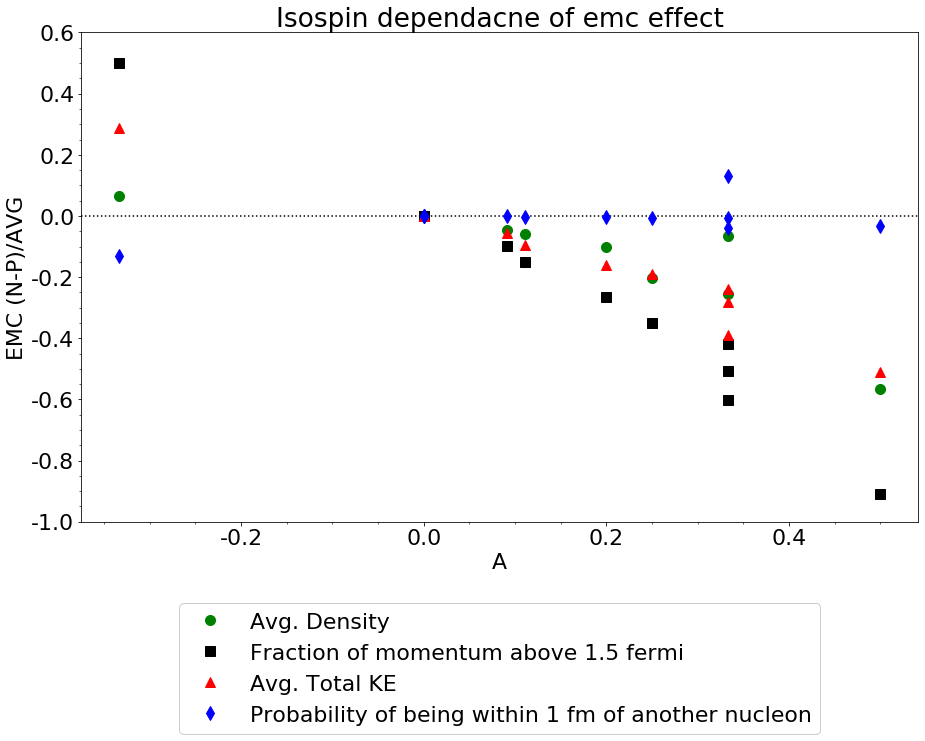

In [59]:
sized = 10
plt.figure(figsize=(15, 9))
#plt.figure(figsize=(15, 6))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.ylim(-1, 0.6)
plt.axhline(y = 0, color = 'k', linestyle = ':')

dabigAhold = []
avgDenhold = []
fracDishold = []
avgKEtothold = []
nearhold = []
i=0
while i<size(data[:,0]):
    if float(data[i,1]) != 0 and float(data[i,tagIndex]) == 1 and dabigA2[i] <= 12:
        NORM =  data[i,normPindex] + data[i,normNindex]
        NORMP = data[i,normPindex] 
        NORMN = data[i,normNindex]
        DENNORM = (data[i,13]+data[i,15])
        avgKEtot[i] = (data[i,totKeN]/NORMN-data[i,totKeP]/NORMP)/avgKEtotD[i]
        avgDen[i] = (data[i,avgdenNindex]-data[i,avgdenPindex])/avgDenD[i]
        fracDis[i] = (data[i,mom1Nindex]/NORMN-data[i,mom1Pindex]/NORMP)/fracDisD[i]
        nearpp = ((data[i,Zindex]-(data[i,Zindex]-1))/2)*data[i,nearPPindex]
        nearnn = ((data[i,Nindex]-(data[i,Nindex]-1))/2)*data[i,nearNNindex]
        nearnp = data[i,nearNPindex]*data[i,Nindex]*data[i,Zindex]
        near[i] = (2/dabigA[i])*(nearnn-nearpp)/nearD[i]
        dabigAhold.append((data[i,Nindex]-data[i,Zindex])/dabigA[i])
        avgDenhold.append(avgDen[i])
        fracDishold.append(fracDis[i])
        avgKEtothold.append(avgKEtot[i])
        nearhold.append(near[i])
        #print(i , dataWN[i,0],near[i]/near_C12,near[i],data[i,nearPPindex],data[i,nearNPindex],data[i,nearNNindex])
    i+=1
avgDenplot  = [[dabigAhold[i], avgDenhold[i]] for i in range(size(dabigAhold))]
fracDisplot = [[dabigAhold[i], fracDishold[i]] for i in range(size(dabigAhold))]
avgKEtotplot = [[dabigAhold[i], avgKEtothold[i]] for i in range(size(dabigAhold))]
nearplot = [[dabigAhold[i], nearhold[i]] for i in range(size(dabigAhold))]
avgDenplot.sort(key=lambda x: x[0])
fracDisplot.sort(key=lambda x: x[0])
avgKEtotplot.sort(key=lambda x: x[0])
nearplot.sort(key=lambda x: x[0])
avgDenplot  = numpy.array(avgDenplot)
fracDisplot  = numpy.array(fracDisplot)
avgKEtotplot  = numpy.array(avgKEtotplot)
nearplot  = numpy.array(nearplot)
plot(avgDenplot[:,0], avgDenplot[:,1],'go', markersize=sized,label='Avg. Density')
plot(fracDisplot[:,0],fracDisplot[:,1],'ks', markersize=sized, label='Fraction of momentum above 1.5 fermi')
plot(avgKEtotplot[:,0], avgKEtotplot[:,1],'r^',markersize=sized, label='Avg. Total KE')
plot(nearplot[:,0], nearplot[:,1],'bd', markersize=sized, label='Probability of being within 1 fm of another nucleon')
xlabel('A')
ylabel('EMC (N-P)/AVG')
#labels = ['Avg. Density','Fraction of momentum above 1.5 fermi','Avg. Total KE','Probability of being within 1 fm of another nucleon']
legend(loc="center", bbox_to_anchor=(.5,-.3))
title('Isospin dependacne of emc effect')